# **Htet Wai Aung**

**The Sparks Foundation: Data Science & Business Analytics Internship**

Task2 : Prediction Using Unsupervised ML

Description : To predict the optimum number of clusers and make visualization from the given 'Iris dataset'.

**Importing Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Data Loading**

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


**Checking data info with plotting**

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


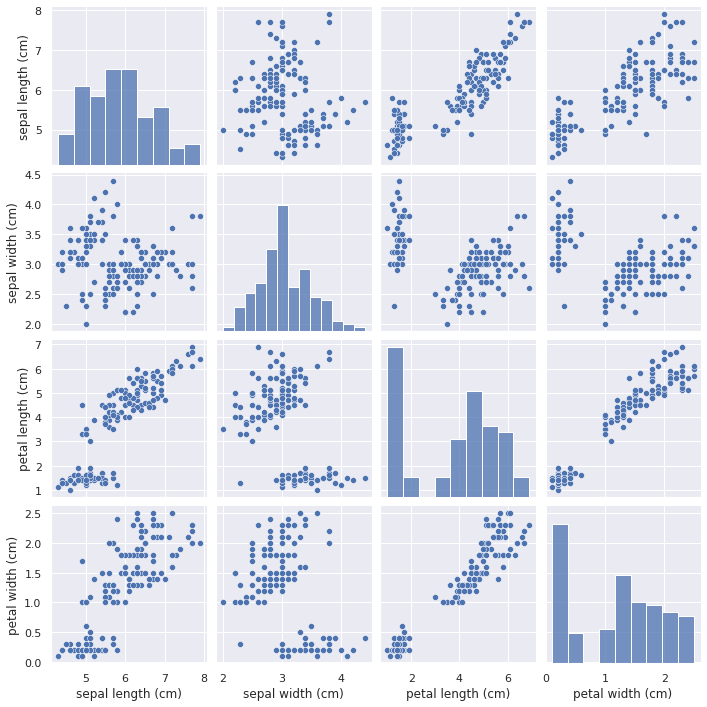

In [5]:
import seaborn as sns

sns.set_theme(style='darkgrid')
sns.pairplot(iris_df)
plt.show()

**Finding the optimum number of clusters with Silhoutte method**

In [6]:
#Silhouette 
for i in range(2, 6):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
      kmeans.fit(iris_df)
      label = kmeans.labels_

      sil_score = silhouette_score(iris_df, label, metric = 'euclidean')
      print("The score for cluster{0} is {1}".format(i, sil_score))

The score for cluster2 is 0.6810461692117462
The score for cluster3 is 0.5528190123564095
The score for cluster4 is 0.49805050499728737
The score for cluster5 is 0.4930804067193521


**Visualization with SilhouetteVisualizer**

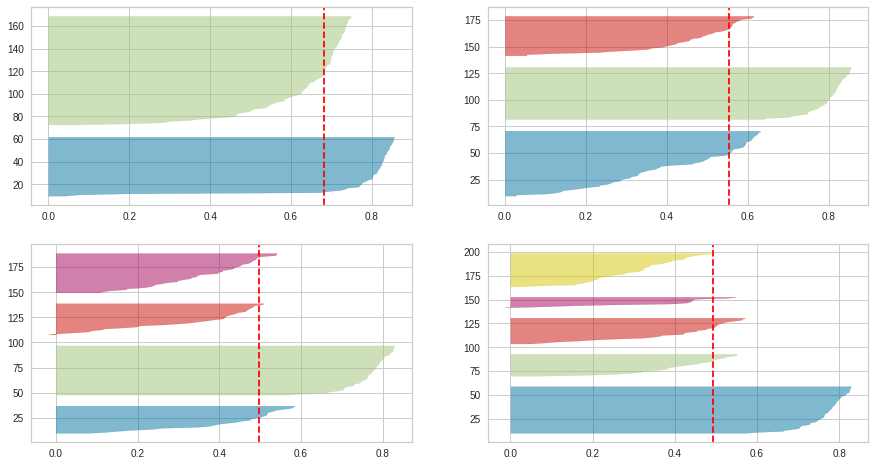

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(iris_df) 

**Creating KMeans Classifier and visualising**

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
model = kmeans.fit_predict(iris_df)

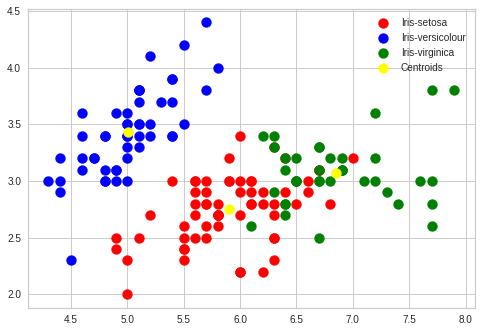

In [9]:
# Clusters Visualization

x = iris_df.iloc[:, [0, 1, 2, 3]].values

plt.scatter(x[model == 0, 0], x[model == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[model == 1, 0], x[model == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[model == 2, 0], x[model == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()